In [24]:
# Libraries Declaration
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from classes import Variables
reward = 1
punishment = -1
feedbackstrategy_random = 0
feedbackstrategy_early = 1
feedbackstrategy_importance = 2
feedbackstrategy_correction = 3

# optimal mistake correcting importance threshold
importancethreshold =  0.01

In [35]:
#from classes.Scenario import Scenario
class Scenario(object):
    
    actualState = 0

    def __init__(self):
        #Neural network weights Deep MLP 2x46x8x1
        self.iw = np.mat("6.9238164774	7.2590406121	;-11.0642990177	-4.5679442843	;-13.9739059084	4.1848153426	;-8.8791470291	5.3048056315	;10.4742453858	3.9665173236	;-21.0854579507	10.2017875554	;7.3405884608	-9.5310376703	;-10.1011106686	-2.3163227587	;-23.1235920421	10.0241597141	;-10.7564741817	0.8848330739	;-9.0475999044	-6.2853315008	;-11.0782890879	7.4075081067	;1.9128471504	11.3423562891	;-10.8463987888	-4.5174329044	;1.6413761867	-10.301994201	;3.8604046748	9.3304565466	;12.8243530351	-6.6217328292	;10.2104881333	-9.3820715769	;9.1688628483	9.112648532	;-8.9045422391	8.9205589871	;-14.8552357987	-7.3945441056	;9.3089286607	8.235215213	;10.0949068503	-7.8050220757	;-0.1540096846	10.0196692174	;-10.5067179699	10.5139376702	;-15.3361990344	0.3652767078	;-9.4654923174	-6.8637592767	;5.8394713682	-10.1876676661	;6.6100796729	-4.8965417508	;12.1236125103	4.7154855681	;-22.162842182	-0.5083451458	;-24.3371531842	0.8390278135	;5.1775858551	11.4212773966	;7.3658536122	-10.3613012331	;9.1030093922	-6.2895619736	;11.5125184372	-5.5666006298	;10.1642196393	-5.0661609667	;11.1650805102	-6.3021726979	;9.8845967996	-3.0549253685	;-11.5777546154	-17.4392035535	;6.525157989	-5.2378575584	;-14.860326498	-4.7764609252	;8.9422775634	7.4877018945	;-5.7577559467	6.1732954024	;8.2603773319	4.1849873275	;10.4921560944	4.3022698661")
        self.lw1 = np.mat("0.8740896112	-0.654229184	1.3340632886	-0.2082553465	-1.0793655553	1.7302181759	-0.4106983628	1.8727862415	1.0339512278	-0.4949443637	2.9072466214	-0.8345920904	-1.4699036101	0.6073815977	1.9921252282	-0.2853743291	3.1752436831	-1.9182921124	1.5133789968	-0.8998314074	-1.1439569142	2.3878036978	-0.0704629993	-1.2071823003	0.3553881578	1.2909436034	-0.9289864364	0.7168112231	3.2693414501	0.7025777143	4.2068370617	2.4502670944	-0.6149442187	1.9977374259	-0.1846960349	-1.3818868027	-0.4401159527	-2.3031517689	0.936143867	-2.1874766417	-0.9060227023	-0.5742953297	0.6773463487	-0.285823865	0.6001369982	1.0859852787	;-1.4508413855	0.7662097708	1.5909325021	1.1275569528	-0.5039532492	0.6880134582	2.570027639	1.1283563225	-0.4555130288	0.6341915446	6.41756643	-0.6580561805	1.998874904	-2.7348208075	2.0270436925	0.4986154939	3.9706189092	-3.8928533514	0.9391543779	-4.979007404	2.1844874554	-0.2194698783	0.9702272877	1.7746625543	1.3206569257	-5.4948354654	-1.0850663169	1.0110046424	-0.9568377059	2.1363904676	11.194993415	-8.2620628601	1.8566317027	3.6524152033	0.6120978692	-0.2420542723	1.0215296101	-0.1244260738	-2.9653582457	3.4860974974	-0.0243108977	0.6374052757	5.0698022352	0.4504356435	-1.9268361582	-1.6276081257	;-2.1523685704	1.4796831986	1.5367967533	0.1425404042	-0.069810081	-1.1333004438	0.1591686163	3.4120000318	-3.5830310024	-0.8610457379	0.4148668826	3.5727297589	-1.3930906441	-0.4080366918	1.2355409057	3.7376137279	1.1791667016	2.5517154966	1.0807332407	-1.969291399	7.5111120942	0.9609890826	-2.3509709725	0.5472426332	2.4380431515	-1.3916147246	4.7096051392	1.9205906783	1.454260192	0.4439443667	-4.9079107015	-0.8720898707	-0.9644199479	2.1543670601	-1.0882006221	-2.342581976	0.3237030828	-1.5926352555	1.2242215831	-0.806442926	0.9099422407	0.1642906345	0.7642144815	-2.4231519381	0.533548319	0.2287500606	;-4.2883289215	-3.4802584935	3.5253767255	0.9137391772	5.2742815987	3.1113868777	4.1244071739	3.6413999024	0.0102081774	-5.8155531418	0.2842338333	-7.8925593817	-1.5578461529	0.3897249044	1.9529054927	-4.0840020949	-4.1260356287	-6.2130366108	-5.9702295483	-2.4983842155	4.03918155	3.1277698078	4.0269712857	1.9654089529	2.5658213457	-3.6300789057	0.4426562552	-0.0931050323	-0.7792276488	2.559985865	11.2575729483	-8.502249391	2.1895978941	3.0030469476	-0.7651985153	2.3453985913	-2.1245627141	1.967105804	-0.8162418349	2.2804244354	0.130418045	1.3162590864	5.3429624904	0.489159331	-2.8692741738	-1.298877034	;-3.1447096469	-0.3470774764	1.1944565465	2.6932236618	1.0338415515	0.606268051	1.4527866642	0.057169096	-4.4683848861	0.246697107	1.8773975795	3.3099561233	5.8279680344	-3.2418087958	-1.4739736693	2.0628233424	-2.7259687205	3.4560602909	-1.9112898146	-2.7959767995	-1.8204832353	0.128095842	0.5812772774	2.6456042328	1.7427798668	0.8534991002	-1.8487438821	0.2845915004	5.0775257341	0.7790485733	-9.7901293218	9.408153783	-5.3171316637	0.3109206524	2.5782935162	-5.8290104402	-0.9813381617	-2.3910869173	1.3790237968	2.3087221596	-1.0490694964	1.3678040613	-0.94445633	2.1950442548	-0.8514840362	3.0744439647	;1.982324184	1.5791034562	19.0967045031	2.1043923214	-1.2075875002	-8.7285840847	2.3175970206	0.6435285036	-11.4047071859	-2.0343467458	2.3140016268	1.5759252344	4.4654771294	-6.7162288086	2.1169820046	0.2541835204	-5.4472324273	3.1524285267	-0.3795618343	3.7371868178	-2.6581498161	-1.1307125688	0.1930718465	0.473512012	-0.1847819117	0.3361656227	-0.6769841183	0.600282991	2.598286397	0.2572135284	-6.4505065754	5.9814018053	7.983653868	-3.3335640336	-1.5351661372	-0.2453214528	-3.8619088194	1.0010389513	-0.9989953825	11.9865712681	3.533751156	2.125117457	-1.9856925556	-0.0591690032	1.5519961016	2.1623480688	;-5.5804248885	-2.1727515999	-5.6419404629	-4.9103170792	0.5500381267	7.3987342498	-1.5861958376	0.7345746026	2.9966145011	-6.6543996458	5.4277100744	-3.6639731806	1.0999605431	6.1400494727	-2.453204562	-0.8167191211	-1.6039924251	-2.1811250062	0.0195169893	-1.6751087256	2.7097368445	5.8800770114	2.423838724	0.4229037805	0.086622211	-0.2939795537	4.4049725239	-4.4630311306	0.1609757767	-0.6268777046	-3.4013403052	-2.1574949543	-2.5610452068	0.8769335348	3.235560725	1.1038642967	1.1407272193	-0.061642651	1.2697240335	1.6182946172	-2.9025063853	-2.2547792517	-0.5097734722	0.0279344144	0.1348776347	-2.3616462881	;-0.0235965602	-0.5228784042	1.2687912414	1.3885763149	0.6596401817	-0.0114573794	-2.4167474376	-2.4514078311	-1.6536539367	-0.4943612209	1.348702281	-1.2076123256	4.6239039061	-1.3182315508	-0.6546611623	-3.5985521735	2.3839140911	0.5264152968	5.7717705529	0.3154204971	2.8546835371	4.6235317599	-2.92414094	-0.4417555648	-3.6684787568	-1.8314964066	1.4188570485	-0.6388752856	3.7243380165	-3.3717187307	0.8230254373	-0.2889777815	3.5072558727	-2.9654598577	1.3566857282	-0.9354168219	0.5857940785	-1.6018361153	2.7538632232	-1.1539296053	-3.7977634462	0.5954279002	-0.2353850974	0.0320212764	0.1151419878	-0.3431359481")	
        self.lw2 = np.mat("-3.2821818943	7.3053343313	-4.1283213449	-7.3449881479	-4.1294170907	7.5369876707	7.5369868066	-3.4471658817")
        self.b1 = np.mat("-9.6094512061	;9.1090731419	;11.5603090511	;9.7970653538	;-8.9510414758	;17.2594473983	;-8.5515552973	;7.7204909178	;14.6625356379	;6.4604773088	;5.0093544574	;6.9958161631	;5.9002704597	;6.1107770806	;-4.0518466071	;-4.1805174969	;-7.4569659451	;-4.1938428979	;-3.7406949043	;1.6361180434	;0.9627144182	;-1.2997822743	;-0.7209345562	;-0.8694880172	;0.6717353627	;0.6798894339	;-0.5001321717	;2.1552472224	;2.8949802519	;4.7499923609	;-7.2905731067	;-8.014666727	;6.355387244	;7.1851143483	;7.4583997827	;4.7198083671	;5.5584595945	;7.1523636529	;8.0752154138	;-14.4516791729	;6.590585438	;-12.0124241864	;10.7418138732	;-9.2735632828	;9.2005977087	;10.6381185646")
        self.b2 = np.mat("2.3613797973	;2.3047108024	;1.260206902	;-1.8886456859	;-0.6464332401	;0.2879900144	;-0.7460862889	;1.4745923483")
        self.b3 = np.mat("-1.1264269344")
        
        self.actions = 8
        self.states = 46
    #end of __init__ method
 
    def getNumberOfStates(self):
        return self.states
    #end of getOfStates method

    def getNumberOfActions(self):
        return self.actions
    #end of getOfStates method

    def getTransition(self, state, action):
        state = state+1
        action = action+1
        stateNormalized =  2*(state-1)/45.0 - 1;
        actionNormalized =  2*(action-1)/7.0 - 1;
        inputData = np.matrix([[stateNormalized], [actionNormalized]])
        hiddenValues1 = np.tanh(self.iw * inputData + self.b1);
        hiddenValues2 = np.tanh(self.lw1 * hiddenValues1 + self.b2);
        outputData = self.lw2 * hiddenValues2 + self.b3;
        outputDesnormalized = int(np.round((outputData + 1)*23 - 1))
        return outputDesnormalized
    #end of getTransition method

    def resetScenario(self):
        self.actualState = 0
    #end of resetScenario method

    def getState(self):
        return self.actualState
    #end of getState method
    
    def executeAction(self, action):
        state = self.getState()
        self.actualState = self.getTransition(state, action)
    #end of executeAction method
    
    def getReward(self):
        if self.actualState == -1:
            return -1
        elif self.actualState == 45:
            return 1
        else:
            return -0.01
#end of class Scenario

In [36]:
#from classes.Agent import Agent
class Agent(object):
    alpha = 0.3  # 0.1 #0.7
    gamma = 0.9  # 0.4
    epsilon = 0.1  # 0.25

    def __init__(self, scenario):
        self.scenario = scenario
        self.numberOfStates = self.scenario.getNumberOfStates()
        self.numberOfActions = self.scenario.getNumberOfActions()
        self.Q = np.random.uniform(0.0, 0.01, (self.numberOfStates, self.numberOfActions))
        self.feedbackAmountTotal = 0
        self.feedbackAmountEpisode = 0

    # end of __init__ method

    def selectAction(self, state):
        if (np.random.rand() <= self.epsilon):
            action = np.random.randint(self.numberOfActions)
        else:
            action = np.argmax(self.Q[state, :])
        # endIf
        return action

    # end of selectAction method

    def actionByFeedback(self, state, teacherAgent, feedbackStrategy, feedbackParameter):
        if (feedbackStrategy == Variables.feedbackstrategy_random):
            if (np.random.rand() < feedbackParameter):
                # get advice
                action = np.argmax(teacherAgent.Q[state, :])
                self.feedbackAmountEpisode += 1
            else:
                action = self.selectAction(state)
        elif (feedbackStrategy == Variables.feedbackstrategy_early):
            if (self.feedbackAmountEpisode < feedbackParameter):
                # get advice
                action = np.argmax(teacherAgent.Q[state, :])
                self.feedbackAmountEpisode += 1
            else:
                action = self.selectAction(state)

        elif (feedbackStrategy == Variables.feedbackstrategy_importance):
            if (self.feedbackAmountEpisode < feedbackParameter and teacherAgent.isImportant(state)):
                # get advice
                action = np.argmax(teacherAgent.Q[state, :])
                self.feedbackAmountEpisode += 1
            else:
                action = self.selectAction(state)

        elif (feedbackStrategy == Variables.feedbackstrategy_correction):
            teacheraction = np.argmax(teacherAgent.Q[state, :])
            selfaction = self.selectAction(state)
            if (self.feedbackAmountEpisode < feedbackParameter and teacherAgent.isImportant(state) and teacheraction != selfaction):
                # get advice

                action = teacheraction

                self.feedbackAmountEpisode += 1
            else:
                action = selfaction

        ####
        # endIf
        return action

    # end of actionByFeedback

    def isImportant(self, state):

        # importance by range
        # importance = max(self.Q[state, :]) - min(self.Q[state, :])

        # importance by total deviation
        importance = np.mean(np.absolute(self.Q[state, :] - np.mean(self.Q[state,:])))
        # print(importance)

        if importance > Variables.importancethreshold:
            return 1

        else:
            return 0

    # end of isImportant

    def train(self, episodes, teacherAgent=None, feedbackStrategy=0, feedbackParameter=0):
        contCatastrophic = 0
        contFinalReached = 0
        steps = np.zeros(episodes)
        rewards = np.zeros(episodes)
        failures = np.zeros(episodes)

        for i in range(episodes):
            contSteps = 0
            accReward = 0
            success = 0
            self.feedbackAmountEpisode = 0
            self.scenario.resetScenario()
            state = self.scenario.getState()
            action = self.actionByFeedback(state, teacherAgent, feedbackStrategy, feedbackParameter)

            # expisode
            while True:
                # perform action
                self.scenario.executeAction(action)
                contSteps += 1

                # get reward
                reward = self.scenario.getReward()
                accReward += reward
                # catastrophic state

                stateNew = self.scenario.getState()

                if reward == Variables.punishment:
                    contCatastrophic += 1
                    self.Q[state, action] = -0.1
                    break

                actionNew = self.actionByFeedback(stateNew, teacherAgent, feedbackStrategy, feedbackParameter)

                # updating Q-values
                self.Q[state, action] += self.alpha * (reward + self.gamma *
                                                       self.Q[stateNew, actionNew] -
                                                       self.Q[state, action])

                if reward == Variables.reward:
                    contFinalReached += 1
                    success = 1
                    break

                state = stateNew
                action = actionNew
            # end of while

            rewards[i] = accReward
            if success == 1:
                steps[i] = contSteps
                failures[i] = 0
            else:
                steps[i] = 0
                failures[i] = 1


            self.feedbackAmountTotal += self.feedbackAmountEpisode

        # end of for
        print("Total feedback amount in all episodes:" + str(self.feedbackAmountTotal))
        print("Total amount of failures" + str(contCatastrophic))
        print("Total amount of successes" + str(contFinalReached))

        return steps, rewards, failures
        # end of train method

# end of class Agent

In [37]:
#from classes.DataFiles import DataFiles
class DataFiles(object):

    def __init__(self):
        self.x = 0
    #end of __init__ method

    def createFile(self, filename):
        myFile=open(filename,'w')
        myFile.close()
    
    def addToFile(self, filename, var):
        myFile=open(filename,'a')
        for i in range(len(var)-1):
            myFile.write(str(int(var[i]))+',')
    
        myFile.write(str(int(var[len(var)-1]))+'\n')
        myFile.close()

    def addFloatToFile(self, filename, var):
        myFile=open(filename,'a')
        for i in range(len(var)-1):
            myFile.write(str(var[i])+',')
    
        myFile.write(str(var[len(var)-1])+'\n')
        myFile.close()
    
    def readFile(self, filename):
        myFile=open(filename,'r')
        line=myFile.readline()
        dataFile = []
        while line != "":
            data = line.split(',')
            dataInt = []
            for i in range(len(data)):
                dataInt.append(int(data[i]))
            
            dataFile.append(dataInt)
            line = myFile.readline()
        myFile.close()
        return dataFile

    def readFloatFile(self, filename):
        myFile=open(filename,'r')
        line=myFile.readline()
        dataFile = []
        while line != "":
            data = line.split(',')
            dataInt = []
            for i in range(len(data)):
                dataInt.append(float(data[i]))
            
            dataFile.append(dataInt)
            line = myFile.readline()
        myFile.close()
        return dataFile

#end of class DataFiles

In [38]:
# Table IRL Scenario
def setupRewardsPlot():
    dataRL = np.genfromtxt(resultsFolder + 'rewardsRL.csv', delimiter=',')
    dataIRL = np.genfromtxt(resultsFolder + 'rewardsIRL.csv', delimiter=',')
    meansRL = np.mean(dataRL, axis=0)
    meansIRL = np.mean(dataIRL, axis=0)

    convolveSet = 50
    convolveRL = np.convolve(meansRL, np.ones(convolveSet) / convolveSet)
    convolveIRL = np.convolve(meansIRL, np.ones(convolveSet) / convolveSet)

    plt.rcParams['font.size'] = 16
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.figure('Collected reward')
    plt.suptitle('Collected reward')

    plt.plot(meansIRL, label='Average reward IRL', linestyle='--', color='r')
    plt.plot(meansRL, label='Average reward RL', linestyle='--', color='y')

    plt.plot(convolveIRL, linestyle='-', color='0.2')
    plt.plot(convolveRL, linestyle='-', color='0.2')

    plt.legend(loc=4, prop={'size': 12})
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.grid()

    my_axis = plt.gca()
    # my_axis.set_ylim(Variables.punishment-0.8, Variables.reward)
    my_axis.set_xlim(convolveSet, len(meansRL))

# end of plotRewards method

In [39]:
def setupFailuresPlot():
    dataRL = np.genfromtxt(resultsFolder + 'failuresRL.csv', delimiter=',')
    dataIRL = np.genfromtxt(resultsFolder + 'failuresIRL.csv', delimiter=',')
    sumRL = np.sum(dataRL, axis=0)
    sumIRL = np.sum(dataIRL, axis=0)

    convolveSet = 50
    convolveRL = np.convolve(sumRL, np.ones(convolveSet) / convolveSet)
    convolveIRL = np.convolve(sumIRL, np.ones(convolveSet) / convolveSet)

    plt.rcParams['font.size'] = 16
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.figure('Total amount of failures')
    plt.suptitle('Total amount of failures')

    plt.plot(sumIRL, label='Total amount of failures IRL', linestyle='--', color='r')
    plt.plot(sumRL, label='Total amount of failures RL', linestyle='--', color='y')

    plt.plot(convolveIRL, linestyle='-', color='0.2')
    plt.plot(convolveRL, linestyle='-', color='0.2')

    plt.legend(loc='center right', prop={'size': 12})
    plt.xlabel('Episodes')
    plt.ylabel('Failures')
    plt.grid()

    my_axis = plt.gca()
    # my_axis.set_ylim(Variables.punishment-0.8, Variables.reward)
    my_axis.set_xlim(convolveSet, len(sumRL))

# end of plotRewards method

In [40]:
def setupStepsPlot():
    dataRL = np.genfromtxt(resultsFolder + 'stepsRL.csv', delimiter=',')
    dataIRL = np.genfromtxt(resultsFolder + 'stepsIRL.csv', delimiter=',')

    meansRL = np.zeros(NUMBER_EPISODES)
    meansIRL = np.zeros(NUMBER_EPISODES)

    for i in range(0, NUMBER_EPISODES):
        episodestepsRL = dataRL[:, i]
        episodestepsIRL = dataIRL[:, i]
        meansRL[i] = np.mean(episodestepsRL[np.nonzero(episodestepsRL)])
        meansIRL[i] = np.mean(episodestepsIRL[np.nonzero(episodestepsIRL)])


    # meansRL = np.mean(dataRL, axis=0)
    # meansIRL = np.mean(dataIRL, axis=0)

    convolveSet = 50
    convolveRL = np.convolve(meansRL, np.ones(convolveSet) / convolveSet)
    convolveIRL = np.convolve(meansIRL, np.ones(convolveSet) / convolveSet)

    plt.rcParams['font.size'] = 16
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.figure('Steps taken')
    plt.suptitle('Steps taken')

    plt.scatter(range(0, NUMBER_EPISODES), meansIRL, label='Average steps IRL', marker='.', color='r')
    plt.scatter(range(0, NUMBER_EPISODES), meansRL, label='Average steps RL', marker='.', color='y')


    # plt.plot(meansIRL, label='Average steps IRL', linestyle='--', color='r')
    # plt.plot(meansRL, label='Average steps RL', linestyle='--', color='y')
    # plt.plot(convolveIRL, linestyle='-', color='0.2')
    # plt.plot(convolveRL, linestyle='-', color='0.2')

    plt.legend(loc='upper center', prop={'size': 12})
    plt.xlabel('Episodes')
    plt.ylabel('Steps')
    plt.grid()

    my_axis = plt.gca()
    # my_axis.set_ylim(Variables.punishment-0.8, Variables.reward)
    my_axis.set_xlim(convolveSet, len(meansRL))

In [41]:
# Feedback parameter meaning differs depending on feedback strategy.
# For random advising: advice probability in every state
# For early advising, importance advising and mistake correcting: Advice budget per episode
def trainAgent(tries, episodes, scenario, teacherAgent=None, feedbackStrategy=0, feedbackParameter=0.0):
    if teacherAgent == None:
        filenameSteps = resultsFolder + 'stepsRL.csv'
        filenameRewards = resultsFolder + 'rewardsRL.csv'
        filenameFailures = resultsFolder + 'failuresRL.csv'
    else:
        filenameSteps = resultsFolder + 'stepsIRL.csv'
        filenameRewards = resultsFolder + 'rewardsIRL.csv'
        filenameFailures = resultsFolder + 'failuresIRL.csv'

    files.createFile(filenameSteps)
    files.createFile(filenameRewards)
    files.createFile(filenameFailures)

    for i in range(tries):
        print('Training agent number: ' + str(i + 1))
        agent = Agent(scenario)
        [steps, rewards, failures] = agent.train(episodes, teacherAgent, feedbackStrategy, feedbackParameter)

        files.addToFile(filenameSteps, steps)
        files.addFloatToFile(filenameRewards, rewards)
        files.addToFile(filenameFailures, failures)
    # endfor

    return agent
# end trainAgent method

Interactive RL for cleaning a table is running ... 
RL is now training the teacher agent with autonomous RL
Training agent number: 1
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 2
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 3
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 4
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 5
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 6
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 7
Total feedback amount in all episodes:0
Total amount of failures100
Total amount of successes0
Training agent number: 8
Total feedback amount in al

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


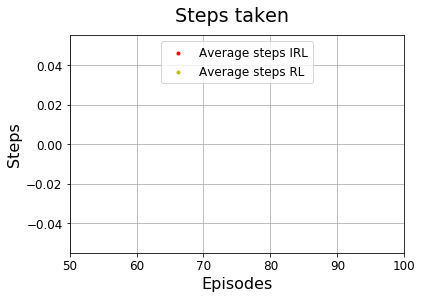

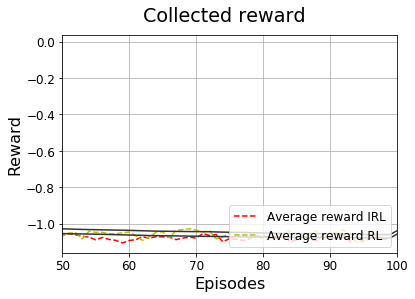

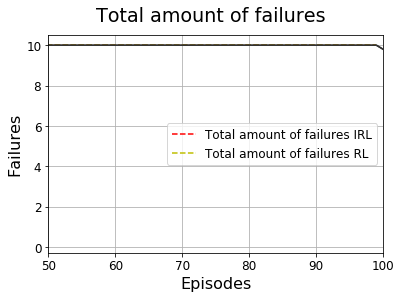

The end


In [43]:
resultsFolder = 'results_test/'
files = DataFiles()
NUMBER_AGENTS = 10
NUMBER_EPISODES = 100

if __name__ == "__main__":
    print("Interactive RL for cleaning a table is running ... ")
    tries = NUMBER_AGENTS
    episodes = NUMBER_EPISODES

    scenario = Scenario()

    # Training with autonomous RL
    print('RL is now training the teacher agent with autonomous RL')
    teacherAgent = trainAgent(tries, episodes, scenario)

    # Training with interactive RL

    # feedbackParameter = 0.3
    # feedbackStrategy = feedbackstrategy_random;
    #
    # feedbackParameter = 3
    # feedbackStrategy = feedbackstrategy_early;
    #
    # feedbackParameter = 4
    # feedbackStrategy = feedbackstrategy_importance;
    #
    feedbackParameter = 3
    feedbackStrategy = feedbackstrategy_correction;

    print('IRL is now training the learner agent with interactive RL')
    learnerAgent = trainAgent(tries, episodes, scenario, teacherAgent, feedbackStrategy, feedbackParameter)
    setupStepsPlot()
    setupRewardsPlot()
    setupFailuresPlot()
    plt.show()

print("The end")  # end of main method
